In [4]:
from dataset.HumanLoader import HumanMattingDataset, DataLoader


data = HumanMattingDataset()

dataloader = DataLoader(data, batch_size = 4 , shuffle = True)

In [5]:
first_batch = next(iter(dataloader))

In [3]:
first_batch[0][0]

tensor([[[0.2510, 0.2510, 0.2510,  ..., 0.1686, 0.1686, 0.1686],
         [0.2627, 0.2667, 0.2667,  ..., 0.1686, 0.1686, 0.1686],
         [0.2824, 0.2824, 0.2824,  ..., 0.1686, 0.1686, 0.1686],
         ...,
         [0.1255, 0.1255, 0.1255,  ..., 0.1216, 0.1333, 0.1255],
         [0.1255, 0.1255, 0.1255,  ..., 0.1137, 0.1176, 0.1216],
         [0.1216, 0.1216, 0.1216,  ..., 0.0941, 0.0863, 0.1020]],

        [[0.1647, 0.1647, 0.1647,  ..., 0.1020, 0.1020, 0.1020],
         [0.1765, 0.1804, 0.1804,  ..., 0.1020, 0.1020, 0.1020],
         [0.1961, 0.1961, 0.1961,  ..., 0.1020, 0.1020, 0.1020],
         ...,
         [0.1216, 0.1216, 0.1216,  ..., 0.1725, 0.1725, 0.1569],
         [0.1098, 0.1137, 0.1137,  ..., 0.1608, 0.1608, 0.1647],
         [0.1098, 0.1098, 0.1098,  ..., 0.1490, 0.1373, 0.1451]],

        [[0.1137, 0.1137, 0.1137,  ..., 0.0745, 0.0745, 0.0745],
         [0.1255, 0.1294, 0.1294,  ..., 0.0745, 0.0745, 0.0745],
         [0.1451, 0.1451, 0.1451,  ..., 0.0706, 0.0706, 0.

In [6]:
import matplotlib.pyplot as plt
def visualize_images(tensor_images):
    tensor_images = tensor_images.cpu()
    
    np_images = tensor_images.numpy().transpose((0, 2, 3, 1))
    
    fig, axs = plt.subplots(1, tensor_images.size(0), figsize=(15, 3))
    
    for i, ax in enumerate(axs):
        # Display the image
        ax.imshow(np_images[i])
        ax.axis('off') 
    plt.show()

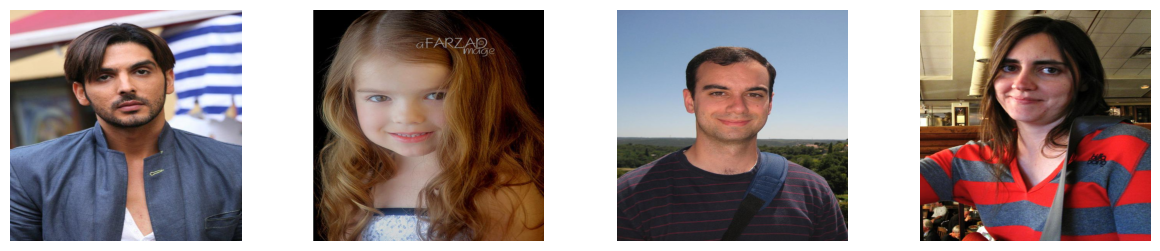

In [7]:
visualize_images(first_batch[0])

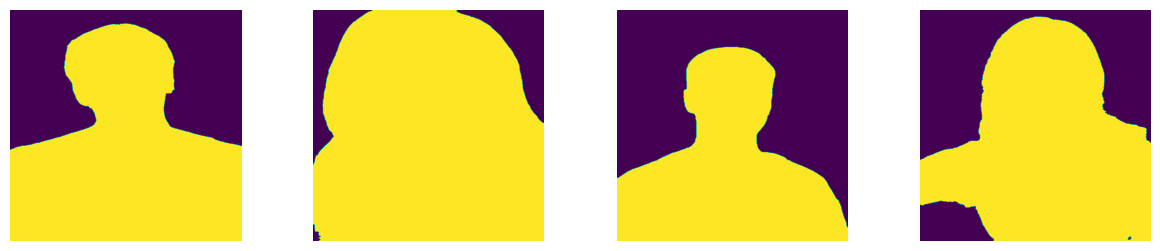

In [8]:
visualize_images(first_batch[1])

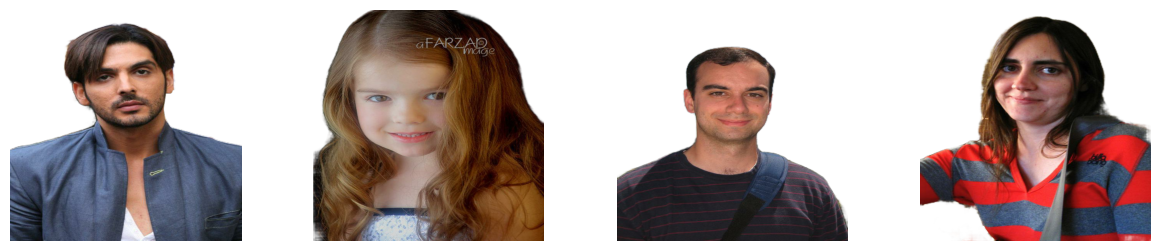

In [9]:
visualize_images(first_batch[2])

In [10]:
from PIL import Image
from torchvision import transforms
img = Image.open('test.jpg')

transform = transforms.Compose(
    [
    transforms.ToTensor(),
    transforms.Resize((304, 512))
    ]
)
x = transform(img)
x = x.unsqueeze(0)
x.shape

C:\Users\letan\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([1, 3, 304, 512])

In [11]:
from model.unet import U_net
import torch
model = U_net(1).to(device='cuda')
weights_dict = torch.load(r'weights/unet_model_best.pth')

# Load weights into the model
model.load_state_dict(weights_dict)

pred = model(x.repeat(2,1,1,1).cuda())


AssertionError: Torch not compiled with CUDA enabled

In [12]:
x = (pred.detach() > 0.1).float()

NameError: name 'pred' is not defined

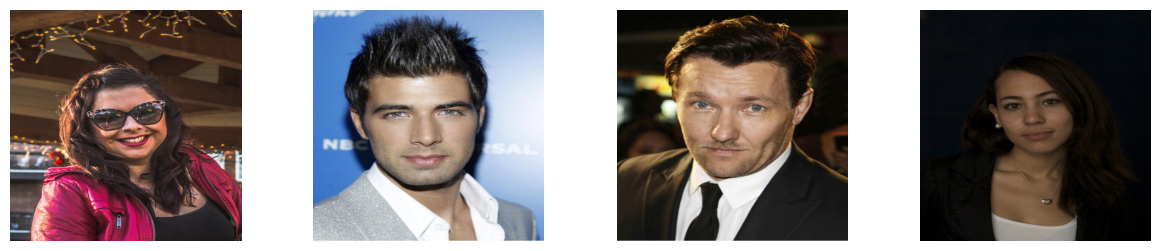

In [10]:
visualize_images(first_batch[0])

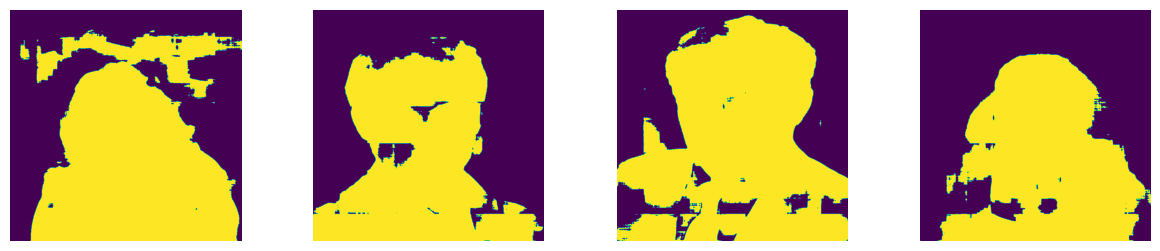

In [11]:

visualize_images(x)

In [17]:
weights_dict.keys()

odict_keys(['down_1.double_conv.0.weight', 'down_1.double_conv.0.bias', 'down_1.double_conv.1.weight', 'down_1.double_conv.1.bias', 'down_1.double_conv.1.running_mean', 'down_1.double_conv.1.running_var', 'down_1.double_conv.1.num_batches_tracked', 'down_1.double_conv.3.weight', 'down_1.double_conv.3.bias', 'down_1.double_conv.4.weight', 'down_1.double_conv.4.bias', 'down_1.double_conv.4.running_mean', 'down_1.double_conv.4.running_var', 'down_1.double_conv.4.num_batches_tracked', 'down_2.max_pooling_and_conv.1.double_conv.0.weight', 'down_2.max_pooling_and_conv.1.double_conv.0.bias', 'down_2.max_pooling_and_conv.1.double_conv.1.weight', 'down_2.max_pooling_and_conv.1.double_conv.1.bias', 'down_2.max_pooling_and_conv.1.double_conv.1.running_mean', 'down_2.max_pooling_and_conv.1.double_conv.1.running_var', 'down_2.max_pooling_and_conv.1.double_conv.1.num_batches_tracked', 'down_2.max_pooling_and_conv.1.double_conv.3.weight', 'down_2.max_pooling_and_conv.1.double_conv.3.bias', 'down_2.ma

In [16]:
weights_dict['down_1.double_conv.0.weight'].shape

torch.Size([64, 3, 3, 3])